In [6]:
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.metrics

In [21]:
#Training on C1 and C2 and testing on C3
NS_case1 = pd.read_excel("NS_EOS_Case1.xlsx")
NS_case2 = pd.read_excel("NS_EOS_Case2.xlsx")
NS_case3 = pd.read_excel("NS_EOS_Case3.xlsx")
NS = pd.concat([NS_case1,NS_case2],ignore_index=True)
X = NS.iloc[:, 0:7].values
y = NS.iloc[:, [7,9,11]].values
X_test = NS_case3.iloc[:, 0:7].values
y_test = NS_case3.iloc[:, [7,9,11]].values
result_new = pd.DataFrame(columns=['Model','RMS','RMS_NS_Mass','RMS_NS_Rad','RMS_Lam','R2'])

In [22]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

## Keeping Random Forest as Control

In [23]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X,y)


#Predicting
y_pred = regressor.predict(X_test)

y_pred = sc_y.inverse_transform(y_pred)
#RMS value
rms = sklearn.metrics.mean_squared_error(y_test, y_pred)**0.5
rms_mass = sklearn.metrics.mean_squared_error(y_test[:,0], y_pred[:,0])**0.5
rms_rad = sklearn.metrics.mean_squared_error(y_test[:,1], y_pred[:,1])**0.5
rms_lam = sklearn.metrics.mean_squared_error(y_test[:,2], y_pred[:,2])**0.5

#R2 value
r2 = sklearn.metrics.r2_score(y_test,y_pred)

result_new = result_new.append({'Model':'Random forest', 'RMS':rms,'RMS_NS_Mass':rms_mass,'RMS_NS_Rad':rms_rad,
                        'RMS_Lam':rms_lam, 'R2':r2}, ignore_index=True)

result_new

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Model       RMS  RMS_NS_Mass  RMS_NS_Rad    RMS_Lam        R2
0  Random forest  7.268397       0.0221    0.071063  12.589013  0.966691

## ANN

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
#create model
model = Sequential()  #creating sequential model; Dense specifies fully connected layer
no_of_hidden_layers = 2
node_in_each_layer = [16,12]
model.add(Dense(node_in_each_layer[0],input_dim=7,activation='relu',kernel_initializer='normal')) #first hidden layer
model.add(Dense(node_in_each_layer[1],activation='relu',kernel_initializer='normal')) #second hidden layer
model.add(Dense(3,kernel_initializer='normal'))
#compile model
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
#Train model
train = model.fit(X,y,epochs=100,batch_size=16)  #size of dataset between 32-512

Train on 3972 samples
Epoch 1/100
3972/3972 [==============================] - 1s 318us/sample - loss: 0.6453 - mean_squared_error: 0.6453
Epoch 2/100
3972/3972 [==============================] - 1s 156us/sample - loss: 0.2980 - mean_squared_error: 0.2980
Epoch 3/100
3972/3972 [==============================] - 1s 156us/sample - loss: 0.1646 - mean_squared_error: 0.1646
Epoch 4/100
3972/3972 [==============================] - 1s 153us/sample - loss: 0.1369 - mean_squared_error: 0.1369
Epoch 5/100
3972/3972 [==============================] - 1s 155us/sample - loss: 0.1234 - mean_squared_error: 0.1234
Epoch 6/100
3972/3972 [==============================] - 1s 156us/sample - loss: 0.1128 - mean_squared_error: 0.1128
Epoch 7/100
3972/3972 [==============================] - 1s 152us/sample - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 8/100
3972/3972 [==============================] - 1s 157us/sample - loss: 0.0938 - mean_squared_error: 0.0938
Epoch 9/100
3972/3972 [===================

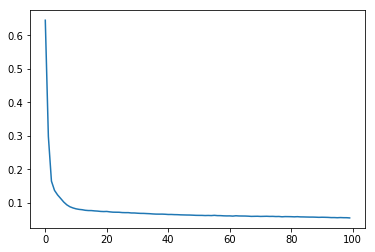

In [26]:
plt.plot(train.history['loss'])

In [39]:
#check performance
y_pred = model.predict(X_test)

y_pred = sc_y.inverse_transform(y_pred)
#RMS value
rms = sklearn.metrics.mean_squared_error(y_test, y_pred)**0.5
rms_mass = sklearn.metrics.mean_squared_error(y_test[:,0], y_pred[:,0])**0.5
rms_rad = sklearn.metrics.mean_squared_error(y_test[:,1], y_pred[:,1])**0.5
rms_lam = sklearn.metrics.mean_squared_error(y_test[:,2], y_pred[:,2])**0.5

#R2 value
r2 = sklearn.metrics.r2_score(y_test,y_pred)

result_new = result_new.append({'Model':'ANN(2HL-16,12 Nodes)', 'RMS':rms,'RMS_NS_Mass':rms_mass,'RMS_NS_Rad':rms_rad,
                        'RMS_Lam':rms_lam, 'R2':r2}, ignore_index=True)

result_new

Model       RMS  RMS_NS_Mass  RMS_NS_Rad    RMS_Lam  \
0         Random forest  7.268397     0.022100    0.071063  12.589013   
1  ANN(2HL-16,12 Nodes)  4.005946     0.007969    0.055738   6.938273   

         R2  
0  0.966691  
1  0.993157

RMSE: 0.007969072341470243


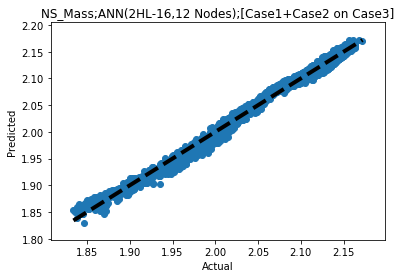

RMSE: 0.055737650890190754


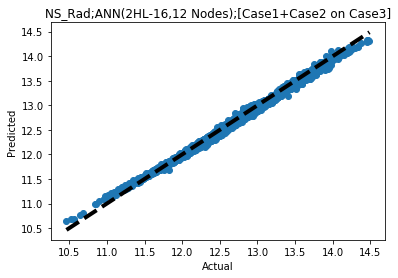

RMSE: 6.938273485034256


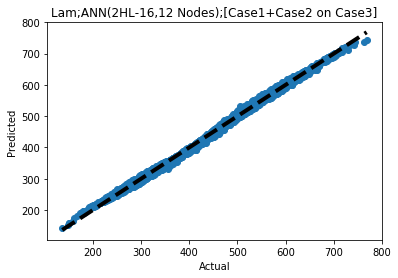

In [58]:
#Plotting
titles = ['NS_Mass','NS_Rad','Lam']
for i in range(3):
    print("RMSE: %s" % (np.sqrt(sklearn.metrics.mean_squared_error(y_test[:,i], y_pred[:,i]))))
    fig, ax = plt.subplots()
    ax.scatter(y_test[:,i], y_pred[:,i])
    ax.plot([y_test[:,i].min(), y_test[:,i].max()], [y_test[:,i].min(), y_test[:,i].max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.title(titles[i]+';ANN(2HL-16,12 Nodes);[Case1+Case2 on Case3]')
    plt.show()

## BNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Different Testing

### Training and Testing on C1

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
NS = pd.read_excel("NS_EOS_Case1.xlsx")
X = NS.iloc[:, 0:7].values
y = NS.iloc[:, [7,9,11]].values
result = pd.DataFrame(columns=['Model','RMS','RMS_NS_Mass','RMS_NS_Rad','RMS_Lam','R2'])

#Standardizing the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#create model
model = Sequential()  #creating sequential model; Dense specifies fully connected layer
no_of_hidden_layers = 2
node_in_each_layer = [16,12]
model.add(Dense(node_in_each_layer[0],input_dim=7,activation='relu',kernel_initializer='normal')) #first hidden layer
model.add(Dense(node_in_each_layer[1],activation='relu',kernel_initializer='normal')) #second hidden layer
model.add(Dense(3,kernel_initializer='normal'))
#compile model
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
#Train model
train = model.fit(X,y,epochs=100,batch_size=16)  #size of dataset between 32-512

Train on 1866 samples
Epoch 1/100
1866/1866 [==============================] - 1s 329us/sample - loss: 0.9230 - mean_squared_error: 0.9230
Epoch 2/100
1866/1866 [==============================] - 0s 106us/sample - loss: 0.4898 - mean_squared_error: 0.4898
Epoch 3/100
1866/1866 [==============================] - 0s 108us/sample - loss: 0.3094 - mean_squared_error: 0.3094 - loss: 0.3178 - mean_squared_error: 0.
Epoch 4/100
1866/1866 [==============================] - 0s 100us/sample - loss: 0.2098 - mean_squared_error: 0.2098
Epoch 5/100
1866/1866 [==============================] - 0s 101us/sample - loss: 0.1898 - mean_squared_error: 0.1898 - loss: 0.1644 - mean_squared_error: 
Epoch 6/100
1866/1866 [==============================] - 0s 103us/sample - loss: 0.1799 - mean_squared_error: 0.1799
Epoch 7/100
1866/1866 [==============================] - 0s 99us/sample - loss: 0.1723 - mean_squared_error: 0.1723s - loss: 0.1669 - mean_squared_error: 0.16
Epoch 8/100
1866/1866 [================

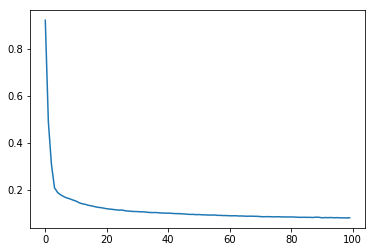

In [34]:
plt.plot(train.history['loss'])

In [35]:
#check performance
y_pred = model.predict(X_test)

y_pred = sc_y.inverse_transform(y_pred)
y = sc_y.inverse_transform(y)
#RMS value
rms = sklearn.metrics.mean_squared_error(y, y_pred)**0.5
rms_mass = sklearn.metrics.mean_squared_error(y[:,0], y_pred[:,0])**0.5
rms_rad = sklearn.metrics.mean_squared_error(y[:,1], y_pred[:,1])**0.5
rms_lam = sklearn.metrics.mean_squared_error(y[:,2], y_pred[:,2])**0.5

#R2 value
r2 = sklearn.metrics.r2_score(y,y_pred)

result = result.append({'Model':'ANN(2HL-16,12 Nodes)', 'RMS':rms,'RMS_NS_Mass':rms_mass,'RMS_NS_Rad':rms_rad,
                        'RMS_Lam':rms_lam, 'R2':r2}, ignore_index=True)

result

Model        RMS  RMS_NS_Mass  RMS_NS_Rad    RMS_Lam  \
0  ANN(2HL-16,12 Nodes)  23.664766     0.021454    0.287981  40.987561   

         R2  
0  0.917348

RMSE: 0.021453959720625464


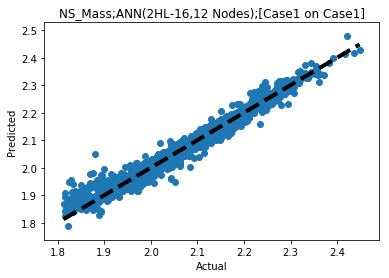

RMSE: 0.2879811762297832


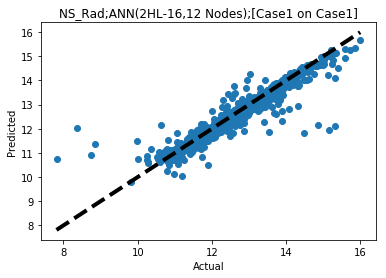

RMSE: 40.98756050336203


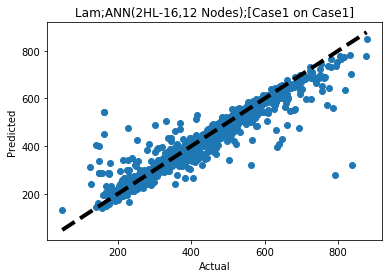

In [36]:
#Plotting
titles = ['NS_Mass','NS_Rad','Lam']
for i in range(3):
    print("RMSE: %s" % (np.sqrt(sklearn.metrics.mean_squared_error(y[:,i], y_pred[:,i]))))
    fig, ax = plt.subplots()
    ax.scatter(y[:,i], y_pred[:,i])
    ax.plot([y[:,i].min(), y[:,i].max()], [y[:,i].min(), y[:,i].max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.title(titles[i]+';ANN(2HL-16,12 Nodes);[Case1 on Case1]')
    plt.show()

### Training on C1 and testing on C2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

NS_case1 = pd.read_excel("NS_EOS_Case1.xlsx")
NS_case2 = pd.read_excel("NS_EOS_Case2.xlsx")
X = NS_case1.iloc[:, 0:7].values
y = NS_case1.iloc[:, [7,9,11]].values
X_test = NS_case2.iloc[:, 0:7].values
y_test = NS_case2.iloc[:, [7,9,11]].values
result = pd.DataFrame(columns=['Model','RMS','RMS_NS_Mass','RMS_NS_Rad','RMS_Lam','R2'])

#Standardizing the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#create model
model = Sequential()  #creating sequential model; Dense specifies fully connected layer
no_of_hidden_layers = 2
node_in_each_layer = [16,12]
model.add(Dense(node_in_each_layer[0],input_dim=7,activation='relu',kernel_initializer='normal')) #first hidden layer
model.add(Dense(node_in_each_layer[1],activation='relu',kernel_initializer='normal')) #second hidden layer
model.add(Dense(3,kernel_initializer='normal'))
#compile model
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
#Train model
train = model.fit(X,y,epochs=100,batch_size=16)  #size of dataset between 32-512

Train on 1866 samples
Epoch 1/100
1866/1866 [==============================] - 2s 1ms/sample - loss: 0.9448 - mean_squared_error: 0.9448
Epoch 2/100
1866/1866 [==============================] - 0s 153us/sample - loss: 0.4870 - mean_squared_error: 0.4870
Epoch 3/100
1866/1866 [==============================] - 0s 173us/sample - loss: 0.2697 - mean_squared_error: 0.2697
Epoch 4/100
1866/1866 [==============================] - 0s 175us/sample - loss: 0.1982 - mean_squared_error: 0.1982
Epoch 5/100
1866/1866 [==============================] - 0s 166us/sample - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 6/100
1866/1866 [==============================] - 0s 163us/sample - loss: 0.1811 - mean_squared_error: 0.1811
Epoch 7/100
1866/1866 [==============================] - 0s 154us/sample - loss: 0.1757 - mean_squared_error: 0.1757
Epoch 8/100
1866/1866 [==============================] - 0s 163us/sample - loss: 0.1701 - mean_squared_error: 0.1701
Epoch 9/100
1866/1866 [=====================

1866/1866 [==============================] - 0s 143us/sample - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 71/100
1866/1866 [==============================] - 0s 146us/sample - loss: 0.0902 - mean_squared_error: 0.0902
Epoch 72/100
1866/1866 [==============================] - 0s 167us/sample - loss: 0.0887 - mean_squared_error: 0.0887
Epoch 73/100
1866/1866 [==============================] - 0s 141us/sample - loss: 0.0883 - mean_squared_error: 0.0883
Epoch 74/100
1866/1866 [==============================] - 0s 128us/sample - loss: 0.0876 - mean_squared_error: 0.0876
Epoch 75/100
1866/1866 [==============================] - 0s 173us/sample - loss: 0.0882 - mean_squared_error: 0.0882
Epoch 76/100
1866/1866 [==============================] - 0s 161us/sample - loss: 0.0869 - mean_squared_error: 0.0869
Epoch 77/100
1866/1866 [==============================] - 0s 169us/sample - loss: 0.0873 - mean_squared_error: 0.0873
Epoch 78/100
1866/1866 [==============================] - 0s 187us/sa

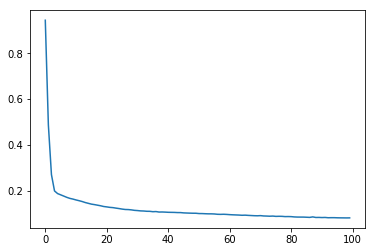

In [4]:
plt.plot(train.history['loss'])

In [8]:
#check performance
y_pred = model.predict(X_test)

y_pred = sc_y.inverse_transform(y_pred)
#RMS value
rms = sklearn.metrics.mean_squared_error(y_test, y_pred)**0.5
rms_mass = sklearn.metrics.mean_squared_error(y_test[:,0], y_pred[:,0])**0.5
rms_rad = sklearn.metrics.mean_squared_error(y_test[:,1], y_pred[:,1])**0.5
rms_lam = sklearn.metrics.mean_squared_error(y_test[:,2], y_pred[:,2])**0.5

#R2 value
r2 = sklearn.metrics.r2_score(y_test,y_pred)

result = result.append({'Model':'ANN(2HL-16,12 Nodes)', 'RMS':rms,'RMS_NS_Mass':rms_mass,'RMS_NS_Rad':rms_rad,
                        'RMS_Lam':rms_lam, 'R2':r2}, ignore_index=True)

result

Model        RMS  RMS_NS_Mass  RMS_NS_Rad    RMS_Lam  \
0  ANN(2HL-16,12 Nodes)  13.446864     0.020869    0.196604  23.289812   

         R2  
0  0.958006

RMSE: 0.020868818711945313


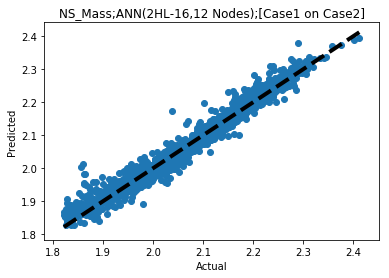

RMSE: 0.19660436195538958


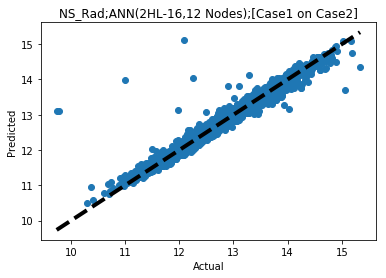

RMSE: 23.28981189161685


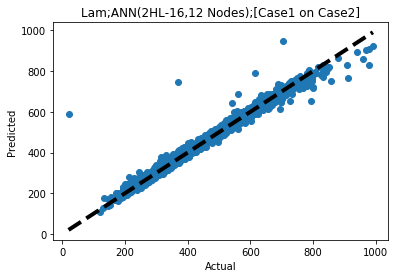

In [10]:
#Plotting
titles = ['NS_Mass','NS_Rad','Lam']
for i in range(3):
    print("RMSE: %s" % (np.sqrt(sklearn.metrics.mean_squared_error(y_test[:,i], y_pred[:,i]))))
    fig, ax = plt.subplots()
    ax.scatter(y_test[:,i], y_pred[:,i])
    ax.plot([y_test[:,i].min(), y_test[:,i].max()], [y_test[:,i].min(), y_test[:,i].max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.title(titles[i]+';ANN(2HL-16,12 Nodes);[Case1 on Case2]')
    plt.show()

# Sampling

In [40]:
#Input mu (mean) -> [e(0),rho(0),K(0),Q(0),J(0),L(0),Ksym(0)]
mu = np.array([-16.0,0.16,230.0,300,32,60,-100])  #small errata in paper, the mean value of Q(0) = +300
#Input sigma (variance) -> [e(0),rho(0),K(0),Q(0),J(0),L(0),Ksym(0)]
sigma = np.array([0.25,0.005,20,100,3,20,100])
#correlations matrix
        #        [e,     rho,     K,     Q,    J,     L,     Ksym]
corr = np.array([[ 1.,   -0.56, -0.23,  0.06,  0.,    0.04,  0.04],
                [-0.56,  1.,   -0.24,  0.27, -0.01, -0.01,  0.07],
                [-0.23, -0.24,  1.,   -0.85, -0.15, -0.22, -0.47],
                [ 0.06,  0.27, -0.85,  1.,    0.04,  0.12,  0.4 ],
                [ 0.,   -0.01, -0.15,  0.04,  1.,    0.82,  0.4 ],
                [ 0.04, -0.01, -0.22,  0.12,  0.82,  1.,    0.81],
                [ 0.04,  0.07, -0.47,  0.4,   0.4,   0.81,  1.  ]])
# Sigma (covariance matrix)
d = np.diag(sigma)
Sigma = d*corr*d
X_new = []
i=0
flag=0
number_of_samples = 100
while flag==0:
    X_test = np.random.multivariate_normal(mu,Sigma,size=(number_of_samples*2,1,1))
    X_test = X_test[:,0,0]
    lower_bound = mu-3*sigma
    upper_bound = mu+3*sigma
    for x in X_test:
        check = (x>lower_bound)==(x<upper_bound)
        if check.all()==True:
            X_new.append(x.tolist())
    i+=1
    if np.array(X_new).shape[0]>=number_of_samples:
        flag=1
X_new = np.array(X_new)[:100]
print("Number of iterations= "+str(i))
X_new

Number of iterations= 1


array([[-1.63082251e+01,  1.57085941e-01,  2.16383299e+02,
         3.18403801e+02,  3.50593904e+01,  3.65330916e+01,
         5.99179129e+00],
       [-1.63456709e+01,  1.58908183e-01,  2.06765912e+02,
         2.96605424e+02,  3.68820226e+01,  7.24844026e+01,
        -7.11979686e+01],
       [-1.60287085e+01,  1.60986184e-01,  1.91975109e+02,
         4.50511921e+02,  3.29153389e+01,  5.54386464e+01,
        -1.33095311e+02],
       [-1.57682408e+01,  1.61083881e-01,  2.18719787e+02,
         4.49162780e+02,  2.67377486e+01,  3.83068372e+01,
        -3.09703944e+01],
       [-1.60580131e+01,  1.51150063e-01,  2.21092040e+02,
         3.80170570e+02,  3.22187482e+01,  6.83562635e+01,
        -1.84437076e+01],
       [-1.60977743e+01,  1.60492045e-01,  2.55115622e+02,
         1.14874718e+02,  2.92838220e+01,  6.71226301e+01,
        -2.31792375e+02],
       [-1.60383831e+01,  1.59619485e-01,  2.24342261e+02,
         2.14395540e+02,  3.21293074e+01,  5.33677850e+01,
        -1.5785826

## Correlations

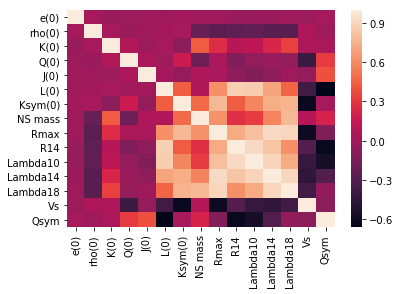

In [48]:
import seaborn as sns
corr = NS.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

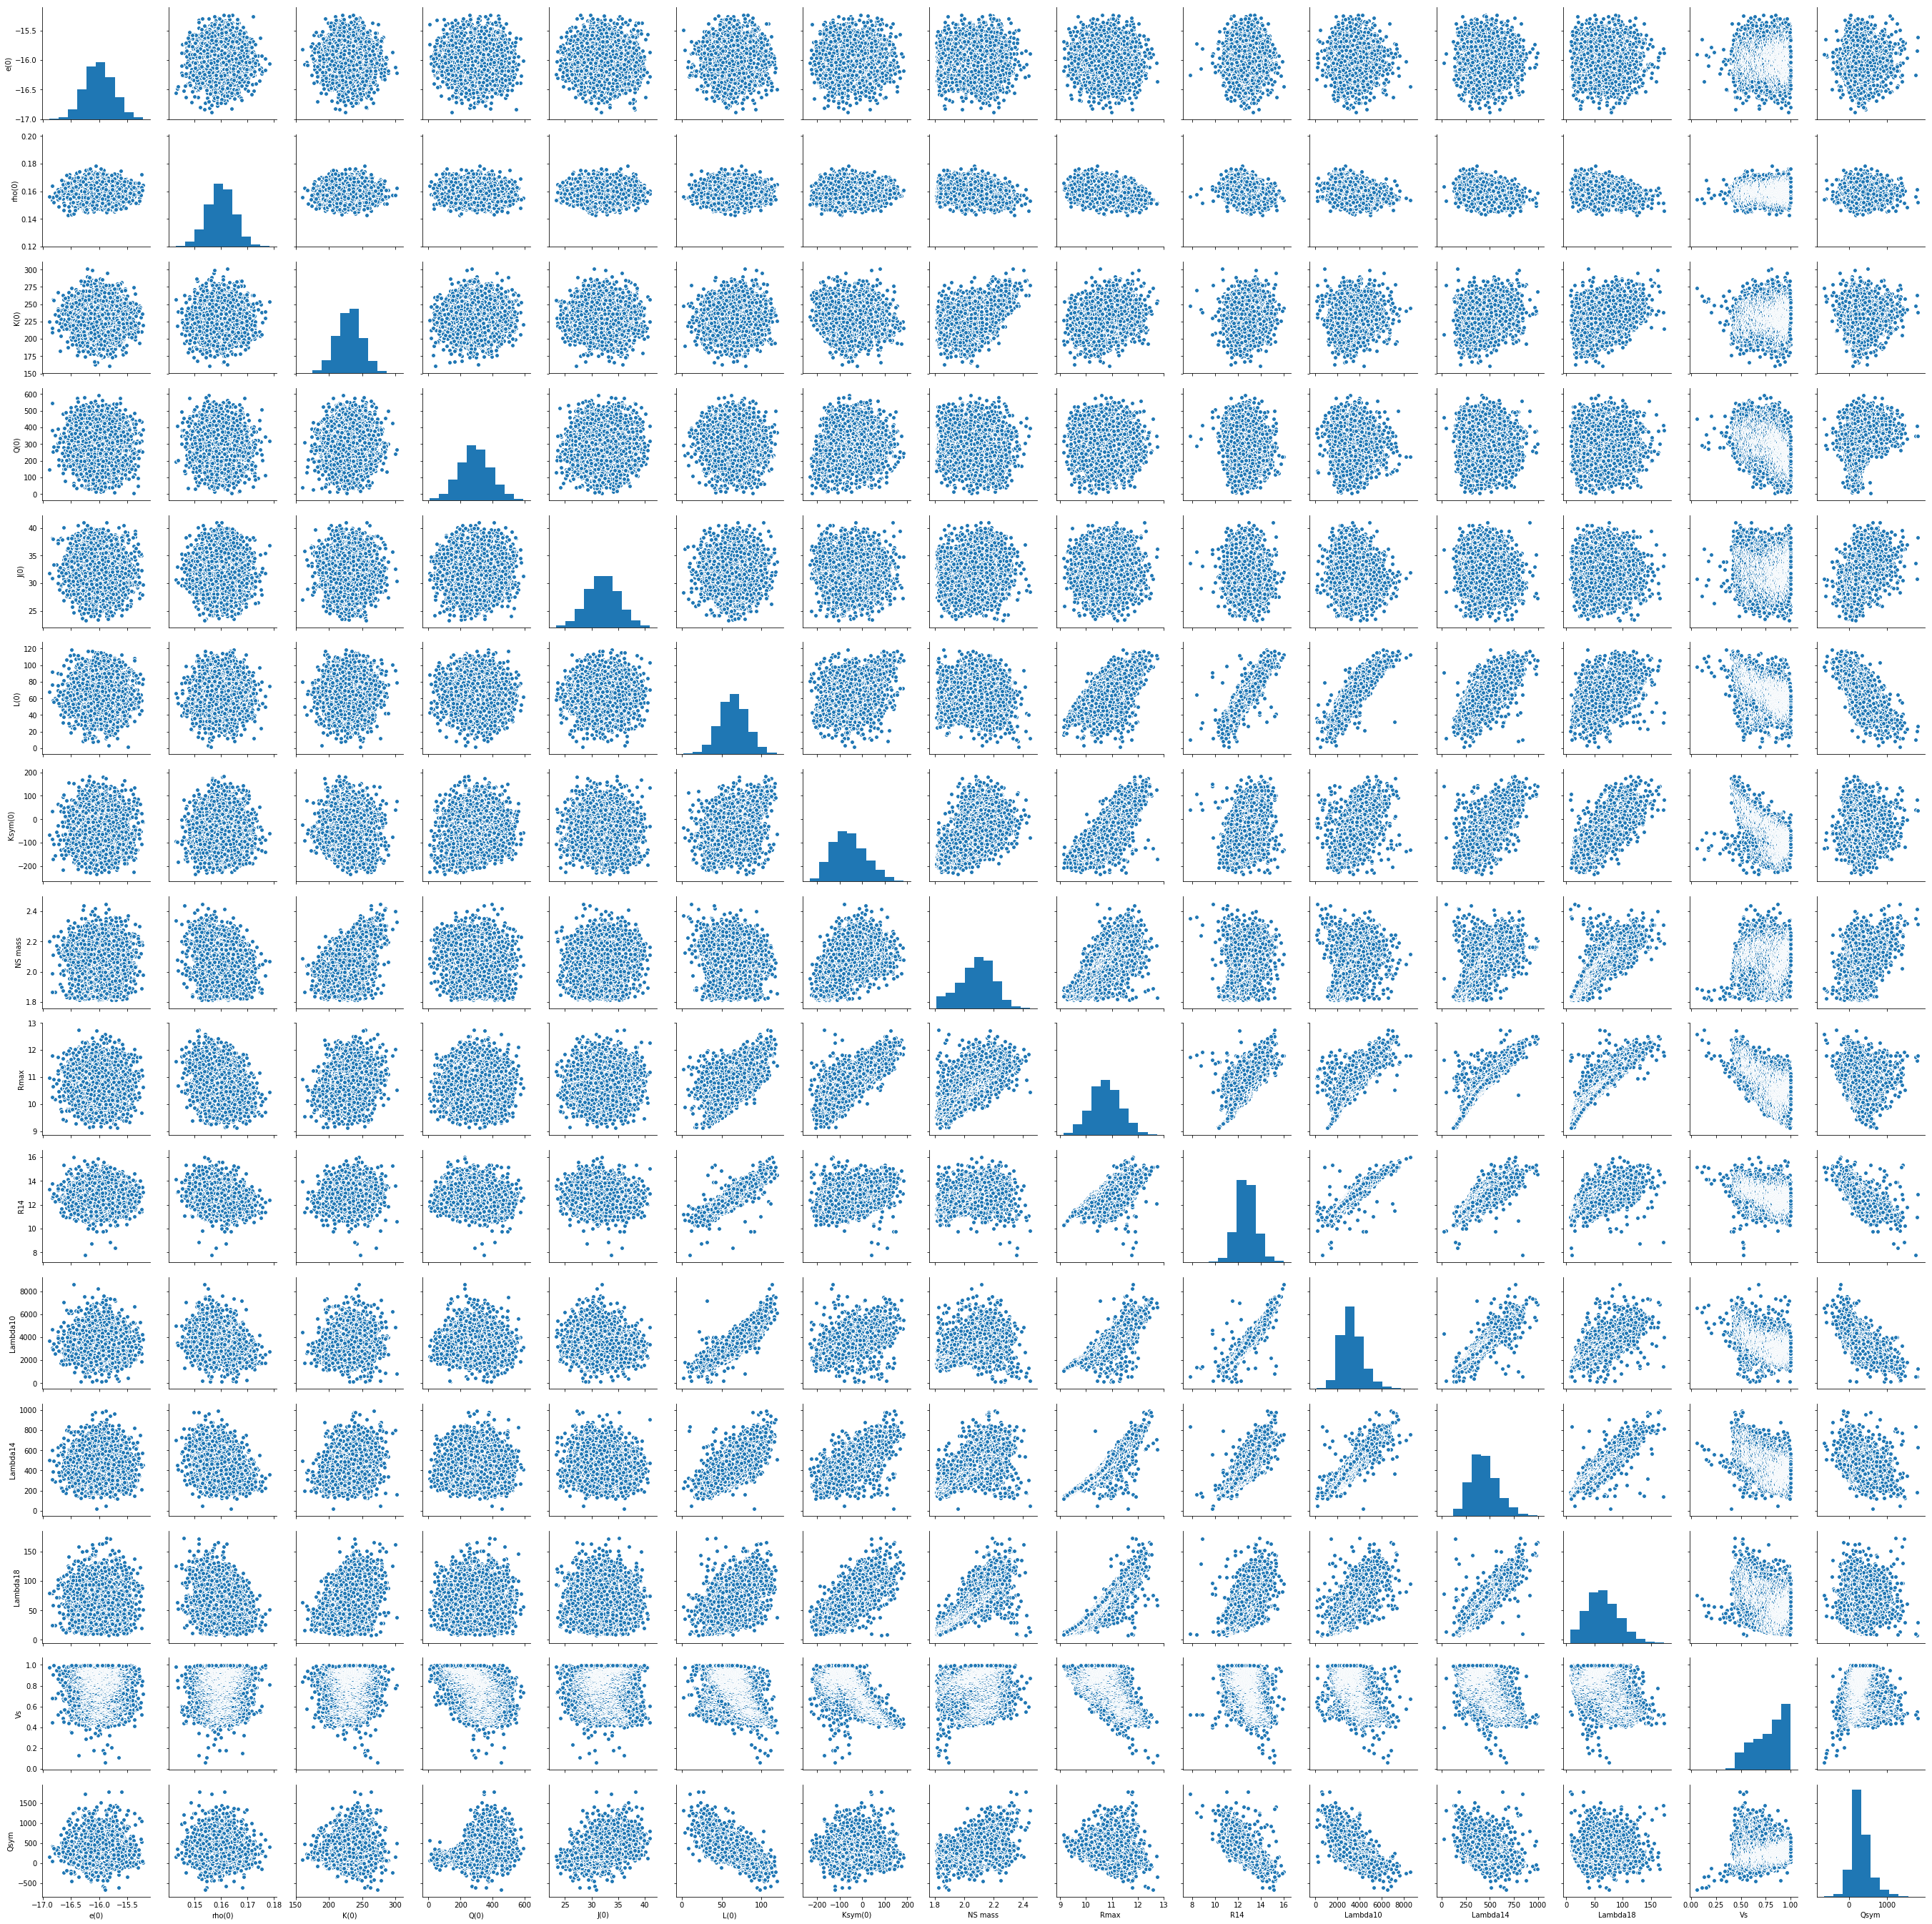

In [50]:
sns.pairplot(NS)

In [ ]:
!jupyter contrib nbextension install --user